# **Benchmarking tmm, fast-tmm, vtmm, and tmmax for Optical Thin Film Coating Design**

In this section, we present the benchmarking results of four different transfer matrix method approach for optical thin film coating design:
- [tmm](https://github.com/sbyrnes321/tmm)
- [tmm-fast](https://github.com/MLResearchAtOSRAM/tmm_fast)
- [vtmm](https://github.com/fancompute/vtmm)
- [tmmax](https://github.com/bahremsd/tmmax)

The goal of this benchmarking is to compare the performance of these libraries in terms of:
- **Computation time** as a function of **layer size**.
- **Computation time** as a function of **wavelength array size** and **angle of incidence array size**.

We analyze how the number of layers in the thin film stack affects the run time and how the vectorized and optimized methods perform under varying conditions.

## **Benchmarking Results**


### **Run Time vs. Layer Size**

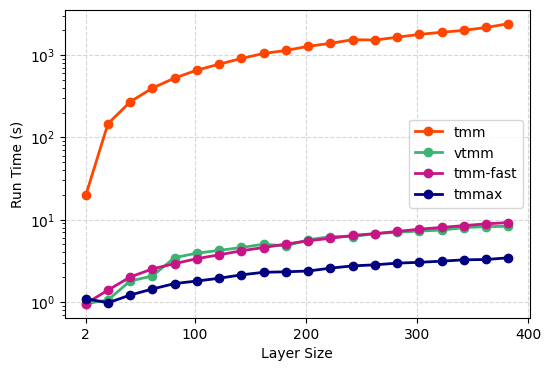

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Load data
number_of_layers = np.arange(2, 400, 20, dtype=int)
tmm = np.load("time_of_tmm.npy")
vtmm = np.load("time_of_vtmm.npy")
tmm_fast = np.load("time_of_tmm_fast.npy")
tmmax = np.load("time_of_tmmax.npy")

# Create the figure and axis
fig, ax = plt.subplots(figsize=(6, 4))

# Plot three curves with labels
ax.plot(number_of_layers, tmm, 'o-', label="tmm", linewidth=2, color='orangered')
ax.plot(number_of_layers, vtmm, 'o-', label="vtmm", linewidth=2, color='mediumseagreen')
ax.plot(number_of_layers, tmm_fast, 'o-', label="tmm-fast", linewidth=2, color='mediumvioletred')
ax.plot(number_of_layers, tmmax, 'o-', label="tmmax", linewidth=2, color='navy')

ax.set_xticks([2,100,200,300,400])
ax.set_yscale('log')
# Customize plot
ax.grid(True, linestyle="--", alpha=0.5)
ax.legend()
ax.set_xlabel("Layer Size")
ax.set_ylabel("Run Time (s)")

plt.savefig("layer_size_benchmark.svg")
plt.savefig("layer_size_benchmark.png", dpi = 600)

# Show the plot
plt.show()

<ipython-input-2-5468d4fa97f2>:17: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 2.5)


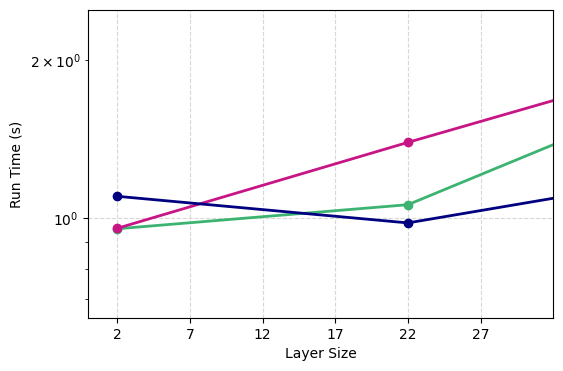

In [2]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(6, 4))

# Plot three curves with labels
ax.plot(number_of_layers, tmm, 'o-', label="tmm", linewidth=2, color='orangered')
ax.plot(number_of_layers, vtmm, 'o-', label="vtmm", linewidth=2, color='mediumseagreen')
ax.plot(number_of_layers, tmm_fast, 'o-', label="tmm-fast", linewidth=2, color='mediumvioletred')
ax.plot(number_of_layers, tmmax, 'o-', label="tmmax", linewidth=2, color='navy')

ax.set_xticks([2,7,12,17,22,27])
ax.set_yscale('log')
# Customize plot
ax.grid(True, linestyle="--", alpha=0.5)
ax.set_xlabel("Layer Size")
ax.set_ylabel("Run Time (s)")
ax.set_xlim(0, 32)
ax.set_ylim(0, 2.5)

plt.savefig("layer_size_benchmark_zoom.svg")
plt.savefig("layer_size_benchmark_zoom.png", dpi = 600)

# Show the plot
plt.show()

### **Run Time** vs. **Wavelength array size** and **Angle of incidences array size**

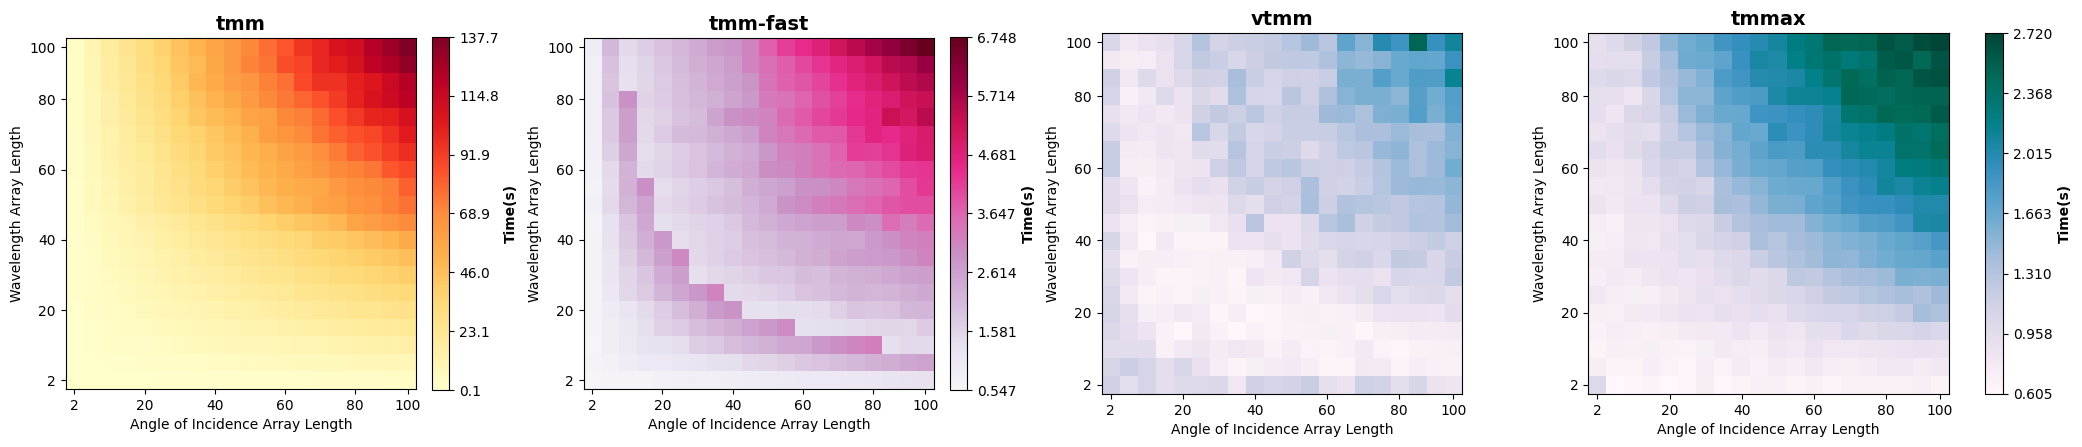

In [3]:
#Load data
tmm_data = np.load("time_of_tmm_wl_theta_arr_exp_8_layer.npy")
tmm_fast_data = np.load("time_of_tmm_fast_wl_theta_arr_exp_8_layer.npy")
vtmm_data = np.load("time_of_vtmm_wl_theta_arr_exp_8_layer.npy")
tmmax_data = np.load("time_of_tmmax_wl_theta_arr_exp_8_layer.npy")

# Create figure and axes
fig, axes = plt.subplots(1, 4, figsize=(25, 5), constrained_layout=False)
fig.subplots_adjust(wspace=0.35)
titles = ['tmm', 'tmm-fast', 'vtmm', 'tmmax']

# Plot the first heatmap and its colorbar
im1 = axes[0].imshow(tmm_data, cmap='YlOrRd', aspect='equal')
axes[0].set_title(titles[0], fontsize=14, fontweight='bold')
axes[0].set_xlabel("Angle of Incidence Array Length", fontsize=10)
axes[0].set_ylabel("Wavelength Array Length", fontsize=10)
axes[0].set_xticks([0, 4, 8, 12, 16, 19])
axes[0].set_yticks([19, 16, 12, 8, 4, 0])
axes[0].set_xticklabels(["2","20","40","60","80","100"])
axes[0].set_yticklabels(["100","80","60","40","20","2"])
axes[0].invert_yaxis()
cbar1 = fig.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)
cbar1.set_label("Time(s)", fontsize=10, fontweight='bold')
cbar1.set_ticks(np.linspace(np.min(tmm_data), np.max(tmm_data), 7, endpoint=True))

# Plot the second heatmap and its colorbar
im2 = axes[1].imshow(tmm_fast_data, cmap='PuRd', aspect='equal')
axes[1].set_title(titles[1], fontsize=14, fontweight='bold')
axes[1].set_xlabel("Angle of Incidence Array Length", fontsize=10)
axes[1].set_ylabel("Wavelength Array Length", fontsize=10)
axes[1].set_xticks([0, 4, 8, 12, 16, 19])
axes[1].set_yticks([19, 16, 12, 8, 4, 0])
axes[1].set_xticklabels(["2","20","40","60","80","100"])
axes[1].set_yticklabels(["100","80","60","40","20","2"])
axes[1].invert_yaxis()
cbar2 = fig.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)
cbar2.set_label("Time(s)", fontsize=10, fontweight='bold')
cbar2.set_ticks(np.linspace(np.min(tmm_fast_data), np.max(tmm_fast_data), 7, endpoint=True))
# Plot the second heatmap and its colorbar
im3 = axes[2].imshow(vtmm_data, cmap='PuBuGn', aspect='equal')
axes[2].set_title(titles[2], fontsize=14, fontweight='bold')
axes[2].set_xlabel("Angle of Incidence Array Length", fontsize=10)
axes[2].set_ylabel("Wavelength Array Length", fontsize=10)
axes[2].set_xticks([0, 4, 8, 12, 16, 19])
axes[2].set_yticks([19, 16, 12, 8, 4, 0])
axes[2].set_xticklabels(["2","20","40","60","80","100"])
axes[2].set_yticklabels(["100","80","60","40","20","2"])
axes[2].invert_yaxis()

# Plot the third heatmap and its colorbar
im4 = axes[3].imshow(tmmax_data, cmap='PuBuGn', aspect='equal')
axes[3].set_title(titles[3], fontsize=14, fontweight='bold')
axes[3].set_xlabel("Angle of Incidence Array Length", fontsize=10)
axes[3].set_ylabel("Wavelength Array Length", fontsize=10)
axes[3].set_xticks([0, 4, 8, 12, 16, 19])
axes[3].set_yticks([19, 16, 12, 8, 4, 0])
axes[3].set_xticklabels(["2","20","40","60","80","100"])
axes[3].set_yticklabels(["100","80","60","40","20","2"])
axes[3].invert_yaxis()
# Create a shared colorbar for the second and third heatmaps
# Adjust the colorbar range based on the min and max values of both the second and third imshow
vmin = min(im3.get_clim()[0], im4.get_clim()[0])
vmax = max(im3.get_clim()[1], im4.get_clim()[1])
im3.set_clim(vmin, vmax)
im4.set_clim(vmin, vmax)

# Create a shared colorbar for the second and third heatmaps
cbar3 = fig.colorbar(im4, ax=axes[2:], orientation='vertical', fraction=0.02, pad=0.04)
cbar3.set_label("Time(s)", fontsize=10, fontweight='bold')
cbar3.set_ticks(np.linspace(np.min(np.minimum(vtmm_data, tmmax_data)), np.max(np.maximum(vtmm_data, tmmax_data)), 7, endpoint=True))
plt.savefig("wl_theta_arr_benchmark_8_layer.svg")
plt.savefig("wl_theta_arr_benchmark_8_layer.png", dpi = 600)
plt.show()


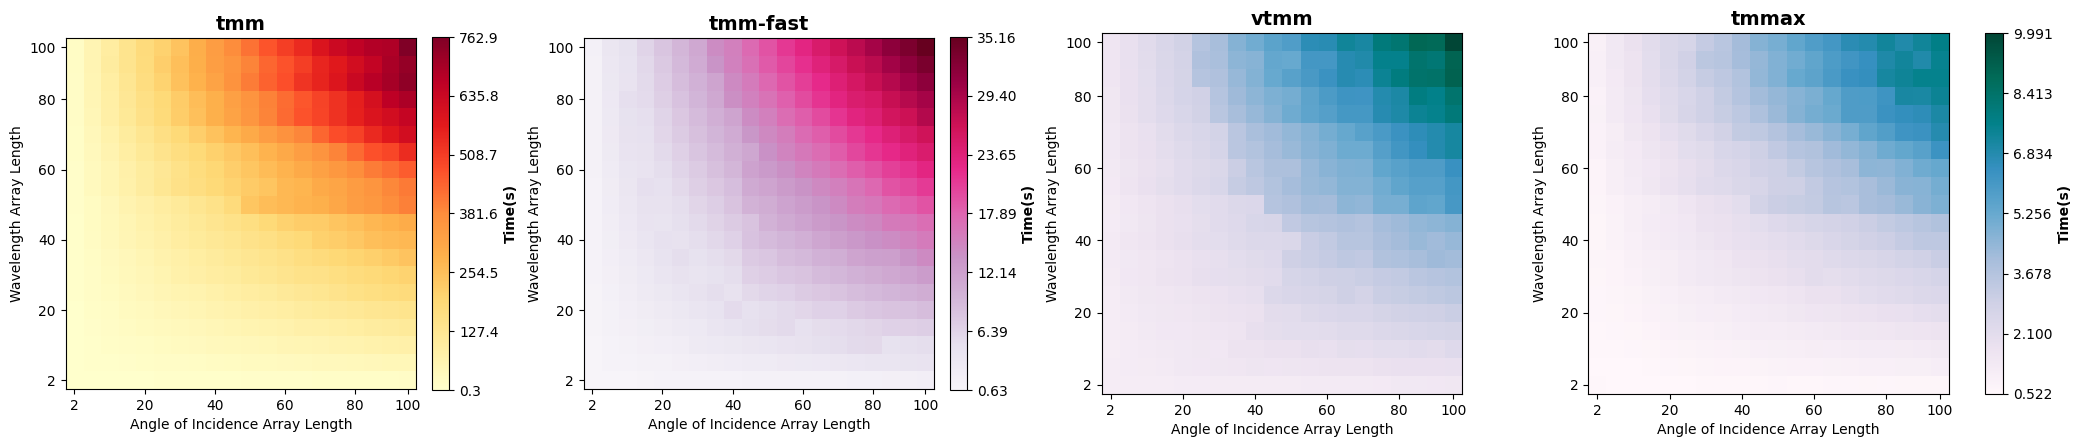

In [4]:
#Load data
tmm_data = np.load("time_of_tmm_wl_theta_arr_exp_80_layer.npy")
tmm_fast_data = np.load("time_of_tmm_fast_wl_theta_arr_exp_80_layer.npy")
vtmm_data = np.load("time_of_vtmm_wl_theta_arr_exp_80_layer.npy")
tmmax_data = np.load("time_of_tmmax_wl_theta_arr_exp_80_layer.npy")

# Create figure and axes
fig, axes = plt.subplots(1, 4, figsize=(25, 5), constrained_layout=False)
fig.subplots_adjust(wspace=0.35)
titles = ['tmm', 'tmm-fast', 'vtmm', 'tmmax']

# Plot the first heatmap and its colorbar
im1 = axes[0].imshow(tmm_data, cmap='YlOrRd', aspect='equal')
axes[0].set_title(titles[0], fontsize=14, fontweight='bold')
axes[0].set_xlabel("Angle of Incidence Array Length", fontsize=10)
axes[0].set_ylabel("Wavelength Array Length", fontsize=10)
axes[0].set_xticks([0, 4, 8, 12, 16, 19])
axes[0].set_yticks([19, 16, 12, 8, 4, 0])
axes[0].set_xticklabels(["2","20","40","60","80","100"])
axes[0].set_yticklabels(["100","80","60","40","20","2"])
axes[0].invert_yaxis()
cbar1 = fig.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)
cbar1.set_label("Time(s)", fontsize=10, fontweight='bold')
cbar1.set_ticks(np.linspace(np.min(tmm_data), np.max(tmm_data), 7, endpoint=True))

# Plot the second heatmap and its colorbar
im2 = axes[1].imshow(tmm_fast_data, cmap='PuRd', aspect='equal')
axes[1].set_title(titles[1], fontsize=14, fontweight='bold')
axes[1].set_xlabel("Angle of Incidence Array Length", fontsize=10)
axes[1].set_ylabel("Wavelength Array Length", fontsize=10)
axes[1].set_xticks([0, 4, 8, 12, 16, 19])
axes[1].set_yticks([19, 16, 12, 8, 4, 0])
axes[1].set_xticklabels(["2","20","40","60","80","100"])
axes[1].set_yticklabels(["100","80","60","40","20","2"])
axes[1].invert_yaxis()
cbar2 = fig.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)
cbar2.set_label("Time(s)", fontsize=10, fontweight='bold')
cbar2.set_ticks(np.linspace(np.min(tmm_fast_data), np.max(tmm_fast_data), 7, endpoint=True))
# Plot the second heatmap and its colorbar
im3 = axes[2].imshow(vtmm_data, cmap='PuBuGn', aspect='equal')
axes[2].set_title(titles[2], fontsize=14, fontweight='bold')
axes[2].set_xlabel("Angle of Incidence Array Length", fontsize=10)
axes[2].set_ylabel("Wavelength Array Length", fontsize=10)
axes[2].set_xticks([0, 4, 8, 12, 16, 19])
axes[2].set_yticks([19, 16, 12, 8, 4, 0])
axes[2].set_xticklabels(["2","20","40","60","80","100"])
axes[2].set_yticklabels(["100","80","60","40","20","2"])
axes[2].invert_yaxis()

# Plot the third heatmap and its colorbar
im4 = axes[3].imshow(tmmax_data, cmap='PuBuGn', aspect='equal')
axes[3].set_title(titles[3], fontsize=14, fontweight='bold')
axes[3].set_xlabel("Angle of Incidence Array Length", fontsize=10)
axes[3].set_ylabel("Wavelength Array Length", fontsize=10)
axes[3].set_xticks([0, 4, 8, 12, 16, 19])
axes[3].set_yticks([19, 16, 12, 8, 4, 0])
axes[3].set_xticklabels(["2","20","40","60","80","100"])
axes[3].set_yticklabels(["100","80","60","40","20","2"])
axes[3].invert_yaxis()
# Create a shared colorbar for the second and third heatmaps
# Adjust the colorbar range based on the min and max values of both the second and third imshow
vmin = min(im3.get_clim()[0], im4.get_clim()[0])
vmax = max(im3.get_clim()[1], im4.get_clim()[1])
im3.set_clim(vmin, vmax)
im4.set_clim(vmin, vmax)

# Create a shared colorbar for the second and third heatmaps
cbar3 = fig.colorbar(im4, ax=axes[2:], orientation='vertical', fraction=0.02, pad=0.04)
cbar3.set_label("Time(s)", fontsize=10, fontweight='bold')
cbar3.set_ticks(np.linspace(np.min(np.minimum(vtmm_data, tmmax_data)), np.max(np.maximum(vtmm_data, tmmax_data)), 7, endpoint=True))
plt.savefig("wl_theta_arr_benchmark_80_layer.svg")
plt.savefig("wl_theta_arr_benchmark_80_layer.png", dpi = 600)
plt.show()
